# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.
This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.
Here are a few questions that this project has sought to answer:
What is the distribution of conservation status for species?
Are certain types of species more likely to be endangered?
Are the differences between species and their conservation status significant?
Which animal is most prevalent and what is their distribution amongst parks?

# Scoping
It's beneficial to create a project scope whenever a new project is being started. Four sections were created below to help guide the project's process and progress. The first section is the project goals, this section will define the high-level objectives and set the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and questions that are aligned with the project goals. Lastly, evaluation will help us build conclusions and findings from our analysis.

# Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:
1. What is the distribution of conservation status for species?
2. Are certain types of species more likely to be endangered?
3. Are the differences between species and their conservation status significant?
4. Which animal is most prevalent and what is their distribution amongst parks?

# Data

This project has two data sets that came with the package. The first csv file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project.

# Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include:
1. Distributions
2. counts
3. relationship between species
4. conservation status of species
5. observations of species in parks.

### Import modules

In [155]:
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt

### Loading and inspect data

In [156]:
species = pd.read_csv('/Users/rismansudarmaji/Downloads/biodiversity_starter/species_info.csv')

In [157]:
observations = pd.read_csv('/Users/rismansudarmaji/Downloads/biodiversity_starter/observations.csv')

In [158]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [159]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [160]:
for column in species.columns:
    print(species[column].value_counts())

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: count, dtype: int64
scientific_name
Castor canadensis            3
Canis lupus                  3
Hypochaeris radicata         3
Columba livia                3
Puma concolor                3
                            ..
Carex                        1
Hexastylis shuttleworthii    1
Hexastylis heterophylla      1
Hexastylis arifolia          1
Tribulus terrestris          1
Name: count, Length: 5541, dtype: int64
common_names
Brachythecium Moss                                                            7
Dicranum Moss                                                                 7
Panic Grass                                                                   6
Bryum Moss                                                                    6
Sphagnum                                             

In [161]:
species.isnull().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [162]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [163]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


### Data cleansing and data analysis

In [164]:
species.fillna('No Intervention', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

In [165]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
dtypes: object(4)
memory usage: 182.1+ KB


In [166]:
conservation_category = species[species.conservation_status != 'No Intervention']\
.groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()

conservation_category



category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


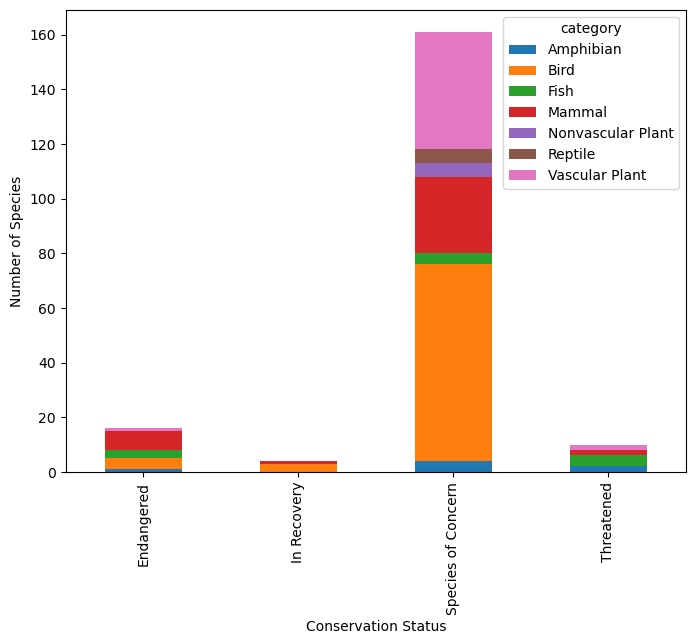

In [167]:
ax = conservation_category.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

In [168]:
species['Protected'] = species.conservation_status != 'No Intervention'

In [169]:
category_counts = species.groupby(['category', 'Protected']).scientific_name.nunique()\
    .reset_index().pivot(columns='Protected', index= 'category', values= 'scientific_name').reset_index()

category_counts.columns= ['category', 'not_protected', 'protected']
category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [170]:
category_counts['percent_protected'] = category_counts.protected/(category_counts.protected + category_counts.not_protected) * 100
category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


In [171]:
from scipy.stats import chi2_contingency

In [172]:
#check chi2 between mammals and bird
contigency_1 = [[146, 30], [413, 75]]
chi2_contingency(contigency_1)

Chi2ContingencyResult(statistic=0.16170148316545574, pvalue=0.6875948096661336, dof=1, expected_freq=array([[148.1686747,  27.8313253],
       [410.8313253,  77.1686747]]))

In [173]:
#pvalue chi2 mammals and bird to high from std pvalue (0.05)
#next we check chi2 mammals and reptile

contingency_2 =[[146, 30], [73, 5]]
chi2_contingency(contingency_2)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[151.7480315,  24.2519685],
       [ 67.2519685,  10.7480315]]))

In [174]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer'],
 ['Feral', 'Hog', 'Wild', 'Pig'],
 ['Coyote'],
 ['Gray', 'Wolf'],
 ['Red', 'Wolf'],
 ['Common', 'Gray', 'Fox', 'Gray', 'Fox'],
 ['Black', 'Fox', 'Cross', 'Fox', 'Red', 'Fox', 'Silver', 'Fox'],
 ['Red', 'Fox'],
 ['Mountain', 'Lion'],
 ['Wild', 'Cat', 'Wildcat'],
 ['Bobcat'],
 ['Panther', 'Mountain', 'Lion'],
 ['Striped', 'Skunk'],
 ['Eastern', 'Spotted', 'Skunk'],
 ['River', 'Otter'],
 ['Northern', 'River', 'Otter'],
 ['Fisher'],
 ['Mink', 'Or', 'Weasel'],
 ['LongTailed', 'Weasel'],
 ['Least', 'Weasel'],
 ['Mink'],
 ['Common', 'Raccoon', 'Raccoon'],
 ['Black', 'Bear'],
 ['Rafinesques', 'BigEared', 'Bat'],
 ['Big', 'Brown', 'Bat'],
 ['SilverHaired', 'Bat'],
 ['Eastern', 'Red', 'Bat', 'Red', 'Bat'],
 ['Hoary', 

In [175]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer'],
 ['Feral', 'Hog', 'Wild', 'Pig'],
 ['Coyote'],
 ['Gray', 'Wolf'],
 ['Red', 'Wolf'],
 ['Common', 'Gray', 'Fox'],
 ['Black', 'Fox', 'Cross', 'Red', 'Silver'],
 ['Red', 'Fox'],
 ['Mountain', 'Lion'],
 ['Wild', 'Cat', 'Wildcat'],
 ['Bobcat'],
 ['Panther', 'Mountain', 'Lion'],
 ['Striped', 'Skunk'],
 ['Eastern', 'Spotted', 'Skunk'],
 ['River', 'Otter'],
 ['Northern', 'River', 'Otter'],
 ['Fisher'],
 ['Mink', 'Or', 'Weasel'],
 ['LongTailed', 'Weasel'],
 ['Least', 'Weasel'],
 ['Mink'],
 ['Common', 'Raccoon'],
 ['Black', 'Bear'],
 ['Rafinesques', 'BigEared', 'Bat'],
 ['Big', 'Brown', 'Bat'],
 ['SilverHaired', 'Bat'],
 ['Eastern', 'Red', 'Bat'],
 ['Hoary', 'Bat'],
 ['Mississippi', 'Myotis', 'Southeastern'],
 ['Gray', 'Myotis'],
 ['Keens', 'Myotis'],
 ['Eastern', 'SmallFooted'

In [176]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res

['Gappers',
 'RedBacked',
 'Vole',
 'American',
 'Bison',
 'Aurochs',
 'Domestic',
 'Cattle',
 'Feral',
 'Domesticated',
 'Domestic',
 'Sheep',
 'Mouflon',
 'Red',
 'Feral',
 'Wapiti',
 'Or',
 'Elk',
 'WhiteTailed',
 'Deer',
 'Feral',
 'Hog',
 'Wild',
 'Pig',
 'Coyote',
 'Gray',
 'Wolf',
 'Red',
 'Wolf',
 'Common',
 'Gray',
 'Fox',
 'Black',
 'Fox',
 'Cross',
 'Red',
 'Silver',
 'Red',
 'Fox',
 'Mountain',
 'Lion',
 'Wild',
 'Cat',
 'Wildcat',
 'Bobcat',
 'Panther',
 'Mountain',
 'Lion',
 'Striped',
 'Skunk',
 'Eastern',
 'Spotted',
 'Skunk',
 'River',
 'Otter',
 'Northern',
 'River',
 'Otter',
 'Fisher',
 'Mink',
 'Or',
 'Weasel',
 'LongTailed',
 'Weasel',
 'Least',
 'Weasel',
 'Mink',
 'Common',
 'Raccoon',
 'Black',
 'Bear',
 'Rafinesques',
 'BigEared',
 'Bat',
 'Big',
 'Brown',
 'Bat',
 'SilverHaired',
 'Bat',
 'Eastern',
 'Red',
 'Bat',
 'Hoary',
 'Bat',
 'Mississippi',
 'Myotis',
 'Southeastern',
 'Gray',
 'Myotis',
 'Keens',
 'Myotis',
 'Eastern',
 'SmallFooted',
 'Bat',
 'Myoti

In [177]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
146,Bat,23
110,Shrew,18
137,Myotis,17
98,Mouse,16
189,Chipmunk,13
96,American,12
140,Squirrel,12
79,Vole,11
16,Eastern,11
62,Western,10


In [178]:
species['is_bat'] = species.common_names.str.contains(r'\bBat\b', regex=True)
species

,category,scientific_name,common_names,conservation_status,Protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
...,...,...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,No Intervention,False,False
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",No Intervention,False,False
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",No Intervention,False,False
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Intervention,False,False


In [179]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,Protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


In [180]:
observation_bat = observations.merge(species[species.is_bat])
observation_bat

,scientific_name,park_name,observations,category,common_names,conservation_status,Protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


In [181]:
observation_bat.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [182]:
observation_by_park_bat = observation_bat.groupby(['park_name', 'Protected']).observations.sum().reset_index()
observation_by_park_bat

,park_name,Protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


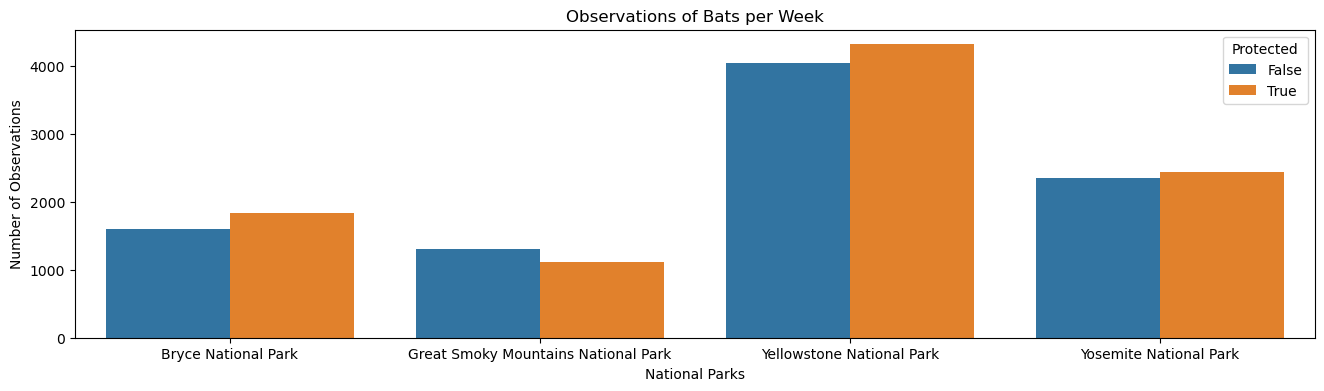

In [184]:
plt.figure(figsize=(16, 4))
sn.barplot(x=observation_by_park_bat.park_name, y= observation_by_park_bat.observations, hue=observation_by_park_bat.Protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

# CONCLUSION:

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.
This project was also able to answer some of the questions first posed in the beginning:
What is the distribution of conservation status for species?
The vast majority of species were not part of conservation.(5,633 vs 191)
Are certain types of species more likely to be endangered?
Mammals and Birds had the highest percentage of being in protection.
Are the differences between species and their conservation status significant?
While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
Which animal is most prevalent and what is their distribution amongst parks?
the study found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.